Esse notebook irá aprofundar as análises geradas em um estudo anterior [link do estudo], mas dessa vez, ao invés de ter uma visão geral da base dados, realizando uma exploração de dados, vamos focar em caractrísticas da base relacionandas ao churn, que é o foco dessa base de dados do Kaggle [link].

Após toda investigação realizada aqui, no próximo notebook [link], vamos gerar modelo de previsão de churn com a base de dados já tratada e com os insights que encontramos aqui.

# Resumo incial

**Bibliotecas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset**

In [2]:
url = "https://github.com/PedroReste/prescriptvie_and_prediction_analysis/raw/main/pt_modelo_de_previsao_de_churn_ecommerce_com_arvore_de_decisao/ecommerce_dataset_tratado.xlsx"
df = pd.read_excel(url)

In [3]:
#Configurações gerais
plt.style.use('ggplot')
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 40)

In [4]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredPaymentMode_Cash,PreferredPaymentMode_Credit,PreferredPaymentMode_Debit,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others
0,50001,1,4,1,3,6,0,3,3,2,0,9,1,11,1,1,5,160,0,0,1,0,0,0,0,1,0,0
1,50002,1,2,1,1,8,1,3,4,3,0,7,1,15,0,1,0,121,0,0,0,0,1,0,0,0,1,0
2,50003,1,2,1,1,30,1,2,4,3,0,6,1,14,0,1,3,120,0,0,1,0,0,0,0,0,1,0
3,50004,1,0,1,3,15,1,2,4,5,0,8,0,23,0,1,3,134,0,0,1,0,0,0,0,1,0,0
4,50005,1,0,1,1,12,1,2,3,5,0,3,0,11,1,1,3,130,0,1,0,0,0,0,0,0,1,0


# Análise dos dados com foco na variável Chrun

**Relembrando todas as variáveis do dataset**
- **CustomerID:** Identificador único dos usuários.
- **Churn:** Sinalização se o usuário deixou de ser cliente ou não. 0 para não e 1 para sim.
- **Tenure:** Tempo que os usuários estão (ou estavam) como clientes da empresa.
- **PreferredLoginDevice:** Método preferencial para logar ao e-commerce. 0 para computer e 1 para mobile.
- **CityTier:**	O nível da cidade.
- **WarehouseToHome:** Distância entre o armazém e os domicílios.
- **Gender:** Gênero dos usuários. 0 para mulher e 1 para homem.
- **HourSpendOnApp:** Quantidade de horas gastas pelos usuários no app ou website do e-commerce.
- **NumberOfDeviceRegistered:**	Total de dispositivos registrado por um usuário.
- **SatisfactionScore:** Pontuação, entre 0 e 5, da satisfação dos usuários.
- **MaritalStatus:** Estado civil dos usuários. 0 para solteiro e 1 para casado.
- **NumberOfAddress:** Total de endereços registrados.
- **Complain:** Se houve reclamações no último mês. 0 para não e 1 para sim.
- **OrderAmountHikeFromlastYear:** Crescimento percentual de pedidos em relação ao último ano.
- **CouponUsed:** Quantidade de cupons utilizados no último mês.
- **OrderCount:** Total de pedidos feitos no último mês.
- **DaySinceLastOrder:** Quantidade de dias desde a última compra.
- **CashbackAmount:** Valor médio do cashback do último mês.

**Variáveis dummyzadas em colunas**
- **PreferredPaymentMode:** Formato de pagamento preferencial.
    - PreferredPaymentMode_Cash
    - PreferredPaymentMode_Credit
    - PreferredPaymentMode_Debit
    - PreferredPaymentMode_E wallet
    - PreferredPaymentMode_UPI
- **PreferedOrderCat:**	Categoria preferencial dos usuários do último mês.
    - PreferedOrderCat_Fashion
    - PreferedOrderCat_Grocery
    - PreferedOrderCat_Laptop & Accessory
    - PreferedOrderCat_Mobile
    - PreferedOrderCat_Others

Como comentado no começo do notebook, já foi feito uma análise incial para conhecer um pouco mais os dados existentes nessa base, além dos tratamento feito e preenchimento de informações vazias.

Agora vamos aprofundar essa análise, realizando um comparativo com a variável Churn para entender se temos carecterísticas predominantes que podem levar ao churn.

Caso não tenha lido a primeira análise[link], descobrimos que a variável Tenure (qtd em meses que o usuário é cliente) parece ser o principal definidor se um cliente tem maior ou menor probilidade de ser churner. Aqui já existe uma possiblidade, de rodar posteriormente o modelo de árvore de decisão sem essa váriavel para verficar se há diferença no resultado.

**Churn**

In [5]:
df["Churn"].replace({0:1, 1:0}, inplace=True)

C:\Users\Computador\AppData\Local\Temp\ipykernel_440\1914397047.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Churn"].replace({0:1, 1:0}, inplace=True)


In [5]:
df["Churn"].value_counts(normalize=True)

Churn
0    0.831616
1    0.168384
Name: proportion, dtype: float64

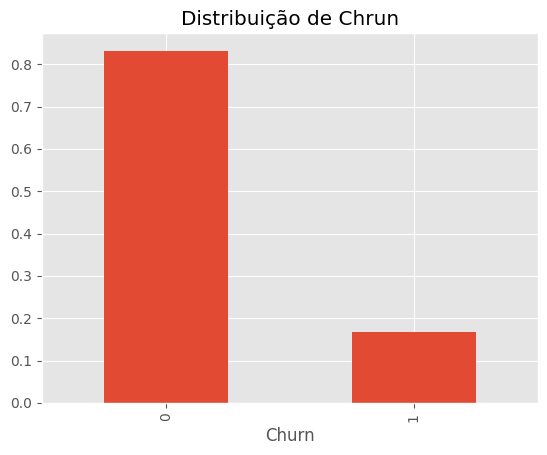

In [6]:
_ = df["Churn"].value_counts(normalize=True).plot.bar()
_ = plt.title("Distribuição de Chrun")
#_ = plt.xticks(range(2), ["Não-Churner", "Churner"])

Temos uma base que a quantidade não-churners e churners é disproporsionla, para rodar modelos vão precisar fazer algo a respeito.

**Tenure**

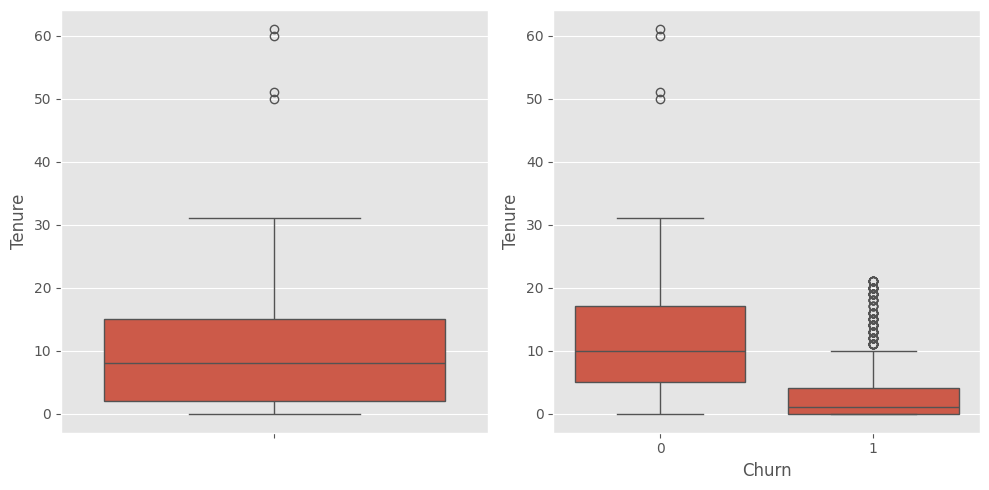

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

_ = sns.boxplot(data=df, y="Tenure", ax=axes[0])
_ = sns.boxplot(data=df, x="Churn", y="Tenure", ax=axes[1])

_ = fig.tight_layout()

Quando observamos com a visão de um boxplot, encontramos alguns valores distoantes em relação ao geral dos dados (outliers) e vemos uma diferença gritante entre não-churners e churners. Corrobora com o que tinha sido encontrado na análise anterior de o tempo como cliente ser o indicador usado para probabilidade de ser chruner ou não, abaixo tem um gráfico da análise anterior mostrando essa diferança de uma forma mais simples.

Text(0.5, 0, '')

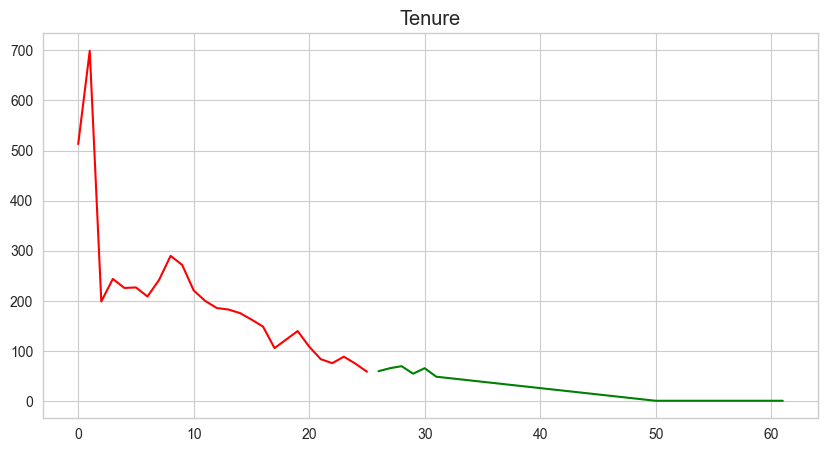

In [16]:
fig, axes = plt.subplots(figsize=(10, 5))

var = df['Tenure'].sort_values().value_counts(sort=False)[df["Churn"] == 0]
sns.lineplot(x= var.index, y=var.values, color="green")

sns.set_style("whitegrid")
var = df['Tenure'].sort_values().value_counts(sort=False)[df["Churn"] == 1]
sns.lineplot(x= var.index, y=var.values, color="red")

axes.set_title("Tenure")
axes.set_xlabel("")

**PreferredLoginDevice**

0 para computador e 1 para mobile

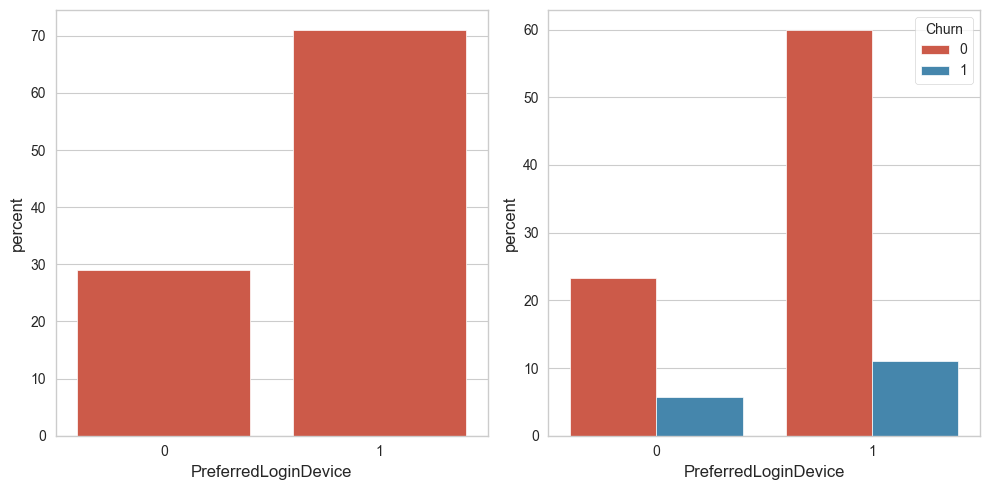

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

_ = sns.countplot(data=df, x="PreferredLoginDevice", stat="percent", ax=axes[0])
_ = sns.countplot(data=df, x="PreferredLoginDevice", stat="percent", hue="Churn", ax=axes[1])

_ = fig.tight_layout()

Comparando com o Churn, não parece que seja uma variável relevante, porém adiante vamos rodar uma matriz de correlação para verificar isso.

**CityTier**

Essa variável não tinha muitas explicações no Kaggle, mas imagino que seja relacionado ao tamanho da cidade.

Algo como 1 para cidade pequena, 2 para cidade média e 3 para cidade grande. Dentro em uma empresa poderiamos buscar quem sabe responder essa dúvida.

Caso não encontramos um padrõa, o ideal será não utilizar por não saber o que significa.

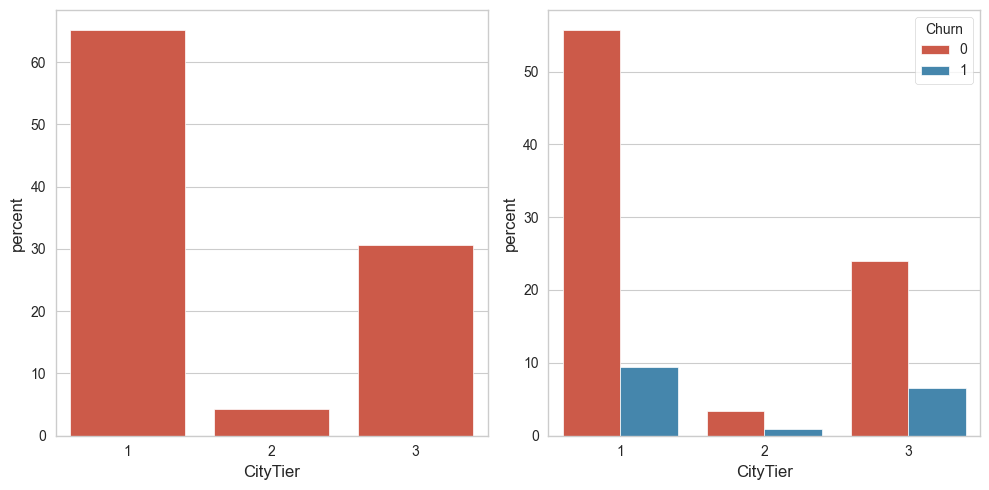

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

_ = sns.countplot(data=df, x="CityTier", stat="percent", ax=axes[0])
_ = sns.countplot(data=df, x="CityTier", stat="percent", hue="Churn", ax=axes[1])

_ = fig.tight_layout()

Não pacere ter também relação com a variável Chrun e pelo padrão dos dados, não podemos ter certeza do que signfica, nessa análise vou preferir não utilizar.

**WarehouseToHome**

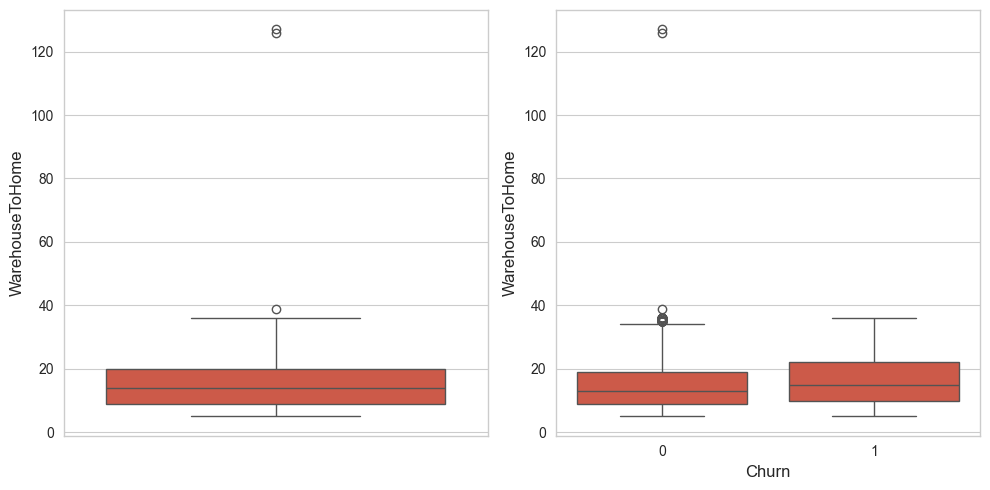

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

_ = sns.boxplot(data=df, y="WarehouseToHome", ax=axes[0])
_ = sns.boxplot(data=df, x="Churn", y="WarehouseToHome", ax=axes[1])

_ = fig.tight_layout()

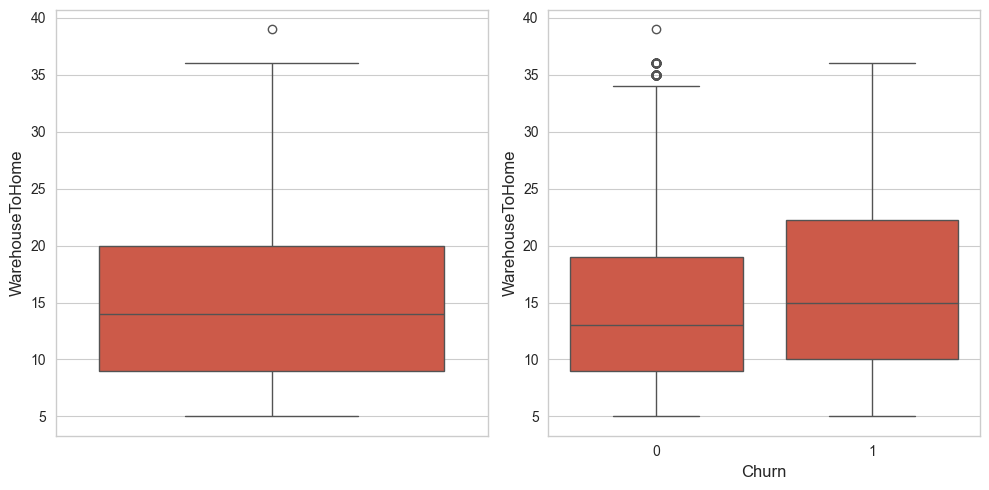

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

_ = sns.boxplot(data=df[df["WarehouseToHome"] < 40], y="WarehouseToHome", ax=axes[0])
_ = sns.boxplot(data=df[df["WarehouseToHome"] < 40], x="Churn", y="WarehouseToHome", ax=axes[1])

_ = fig.tight_layout()

Além dos outliers visiveis, parece que quando a distância entre o armázem de produtos e a casa dos consumidores, a tendência de churn é maior. Vale a epna talvez segmentar por esse critério também.

**Gender**

0 para mulheres e 1 para homens

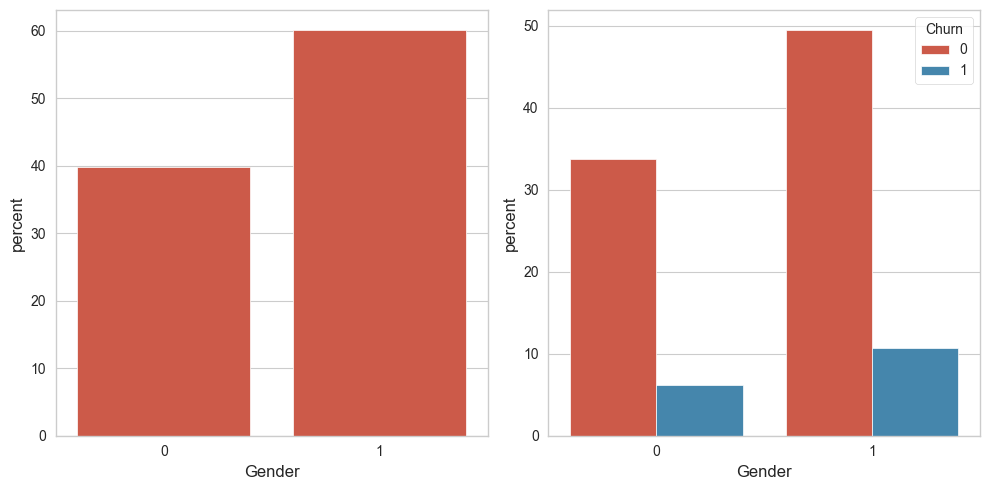

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

_ = sns.countplot(data=df, x="Gender", stat="percent", ax=axes[0])
_ = sns.countplot(data=df, x="Gender", stat="percent", hue="Churn", ax=axes[1])

_ = fig.tight_layout()

Proporcionalmente, não pacerece que gênero seja um fator importante em relação ao churn

**HourSpendOnApp**

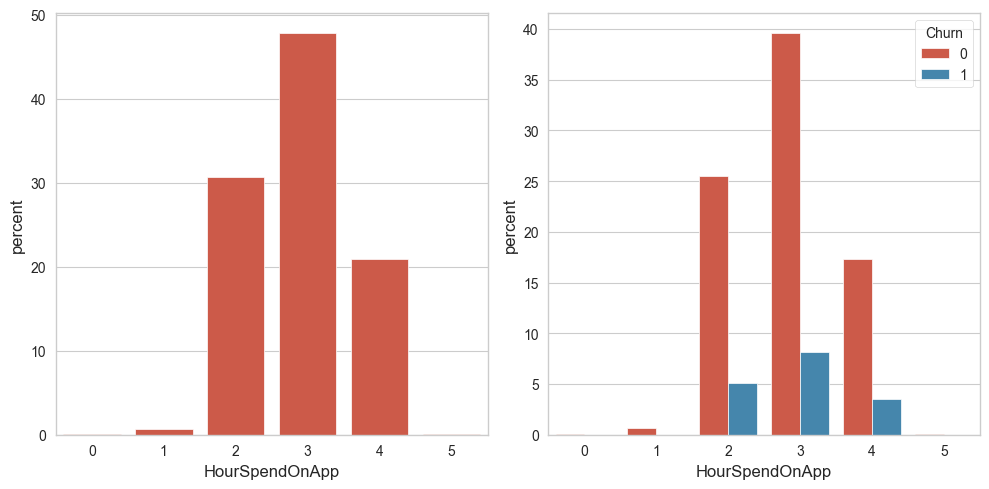

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

_ = sns.countplot(data=df, x="HourSpendOnApp", stat="percent", ax=axes[0])
_ = sns.countplot(data=df, x="HourSpendOnApp", hue="Churn", stat="percent", ax=axes[1])

_ = fig.tight_layout()

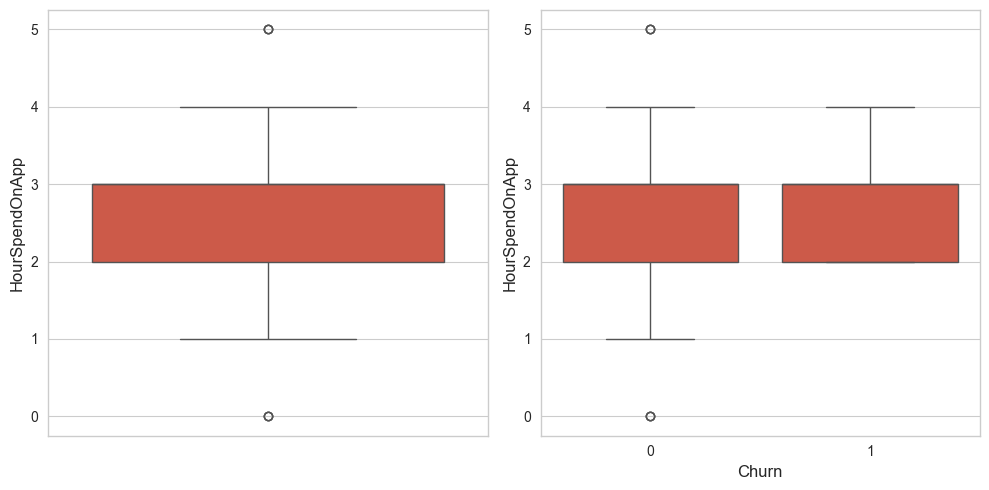

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

_ = sns.boxplot(data=df, y="HourSpendOnApp", ax=axes[0])
_ = sns.boxplot(data=df, x="Churn", y="HourSpendOnApp", ax=axes[1])

_ = fig.tight_layout()

In [53]:
df["HourSpendOnApp"].sort_values().value_counts(sort=False), df["HourSpendOnApp"].sort_values().value_counts(normalize=True, sort=False) * 100

(HourSpendOnApp
 0       3
 1      35
 2    1724
 3    2689
 4    1176
 5       3
 Name: count, dtype: int64,
 HourSpendOnApp
 0     0.053286
 1     0.621670
 2    30.621670
 3    47.761989
 4    20.888099
 5     0.053286
 Name: proportion, dtype: float64)

Parece que não faz sentido manter clientes utilizaram menos de 1h ou mais de 5h o app/site da empresa.
Apenas comparando com o churn, não pacere ser uma métrica que seja tão relevante.

**NumberOfDeviceRegistered**

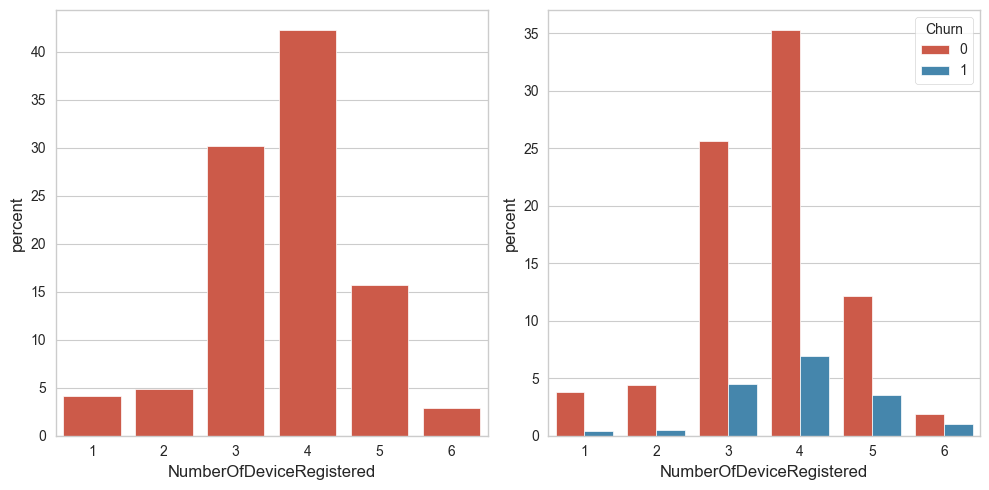

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

_ = sns.countplot(data=df, x="NumberOfDeviceRegistered", stat="percent", ax=axes[0])
_ = sns.countplot(data=df, x="NumberOfDeviceRegistered", hue="Churn", stat="percent", ax=axes[1])

_ = fig.tight_layout()

Apenas comparando com o churn, não pacere ser uma métrica que seja tão relevante.

**SatisfactionScore**

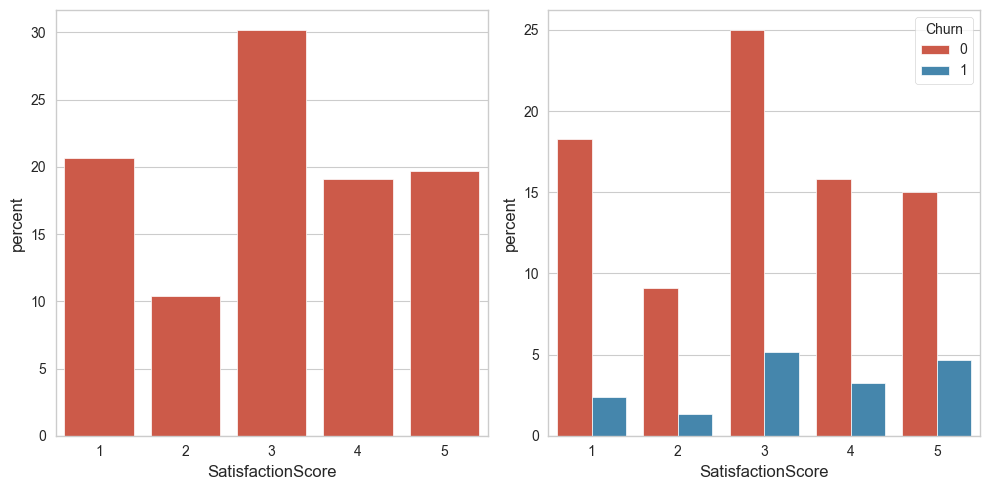

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

_ = sns.countplot(data=df, x="SatisfactionScore", stat="percent", ax=axes[0])
_ = sns.countplot(data=df, x="SatisfactionScore", hue="Churn", stat="percent", ax=axes[1])

_ = fig.tight_layout()

Esse é um ponto curioso, que até onde tenho conhecimento, não parece fazer tanto sentido. Porque alguém daria nota 5 e se tornaria um churner?

Parece que a coluna churn é dada pela probabilidade ser maior de churner estarem antes dos 25 meses com o e-commerce e deixarem de ser depois desse período.

Vou terminar de analisar todas as variáveis para dar proseguimento em alternativas.

**MaritalStatus**

0 para solteiros e 1 para casados

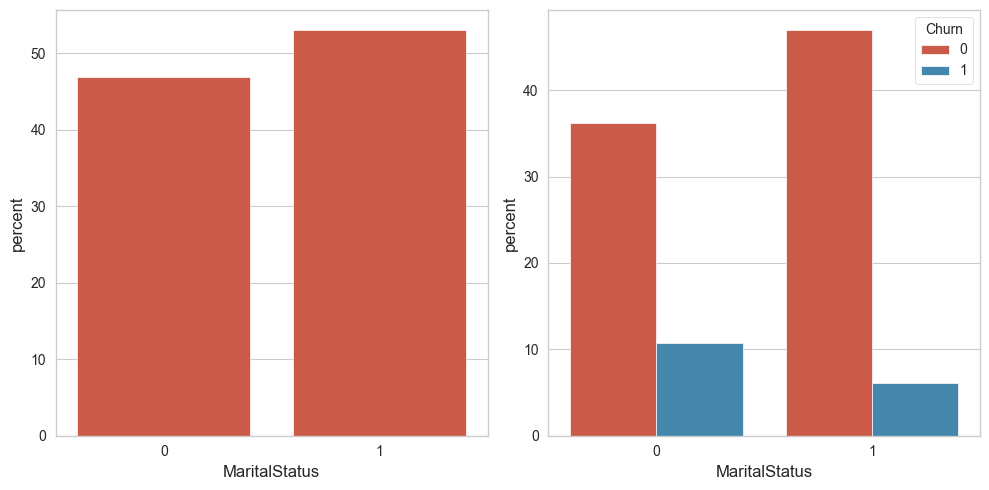

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

_ = sns.countplot(data=df, x="MaritalStatus", stat="percent", ax=axes[0])
_ = sns.countplot(data=df, x="MaritalStatus", hue="Churn", stat="percent", ax=axes[1])

_ = fig.tight_layout()

Apenas comparando com o churn, não pacere ser uma métrica que seja tão relevante.

**NumberOfAddress**

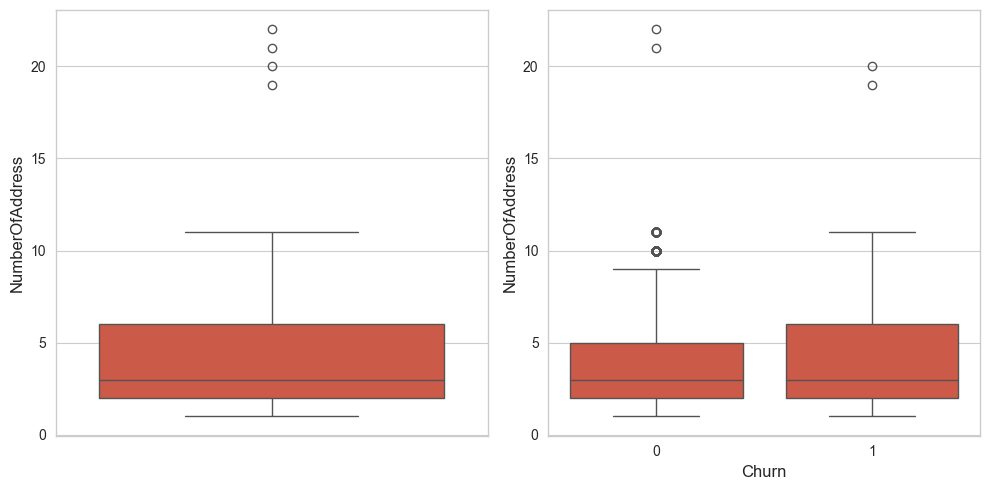

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

_ = sns.boxplot(data=df, y="NumberOfAddress", ax=axes[0])
_ = sns.boxplot(data=df, x="Churn", y="NumberOfAddress", ax=axes[1])

_ = fig.tight_layout()

Apenas comparando com o churn, não pacere ser uma métrica que seja tão relevante. Possui outliers

**Complain**

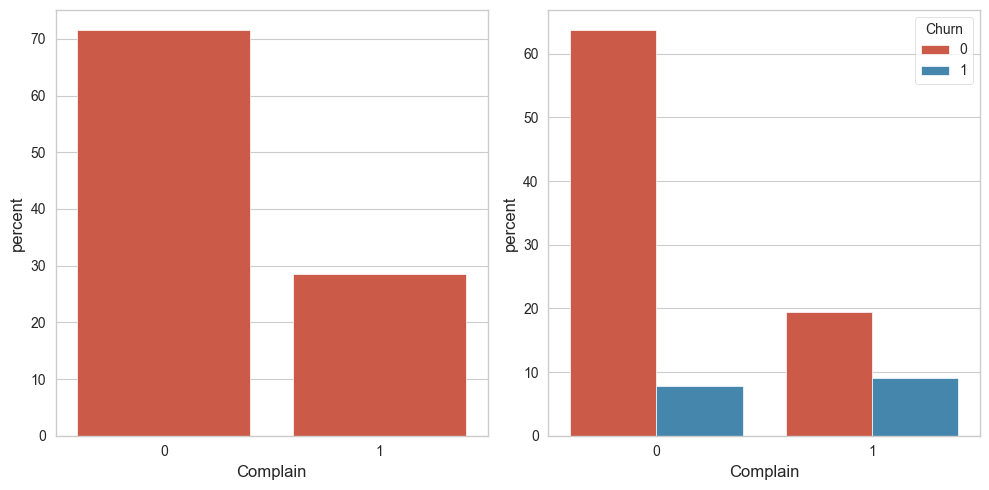

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

_ = sns.countplot(data=df, x="Complain", stat="percent", ax=axes[0])
_ = sns.countplot(data=df, x="Complain", hue="Churn", stat="percent", ax=axes[1])

_ = fig.tight_layout()

Parece que faz sentido crescer o percentual de churners quando existe reclamações, mas não são tantos.

**OrderAmountHikeFromlastYear**

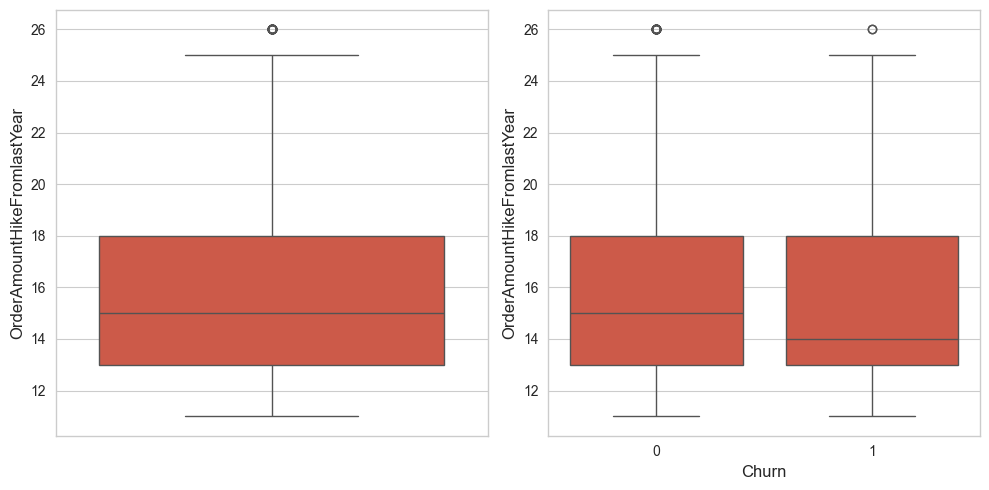

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

_ = sns.boxplot(data=df, y="OrderAmountHikeFromlastYear", ax=axes[0])
_ = sns.boxplot(data=df, x="Churn", y="OrderAmountHikeFromlastYear", ax=axes[1])

_ = fig.tight_layout()

**CouponUsed**

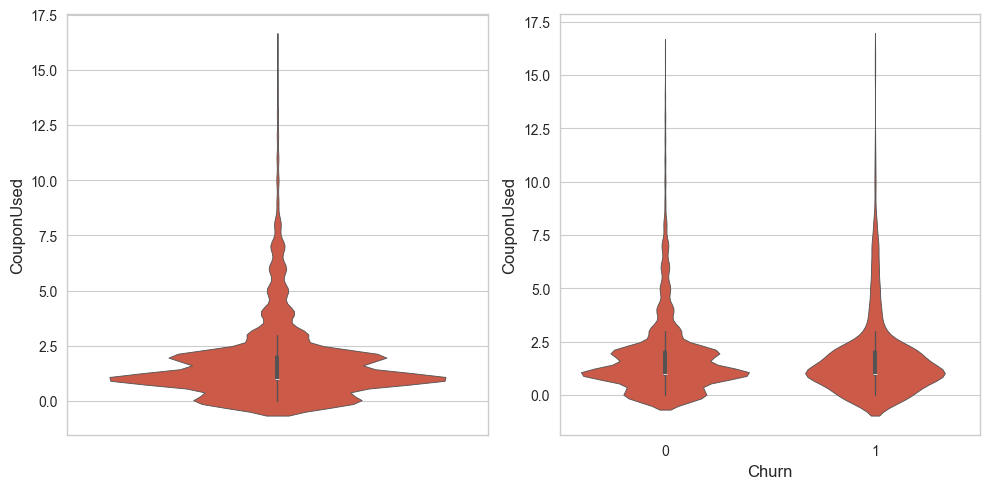

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

_ = sns.violinplot(data=df, y="CouponUsed", ax=axes[0])
_ = sns.violinplot(data=df, x="Churn", y="CouponUsed", ax=axes[1])

_ = fig.tight_layout()

Validar um limite total de cupons por conta dos outliers

**OrderCount**

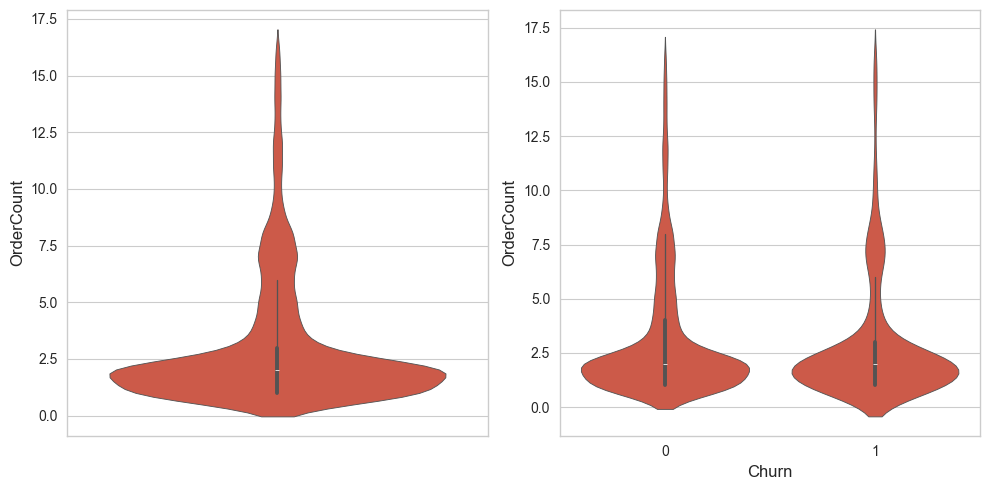

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

_ = sns.violinplot(data=df, y="OrderCount", ax=axes[0])
_ = sns.violinplot(data=df, x="Churn", y="OrderCount", ax=axes[1])

_ = fig.tight_layout()

Também validar esses usuários com uma maior quantidade de pedidos feitos se são possíveis de serem considerados outliers

**DaySinceLastOrder**

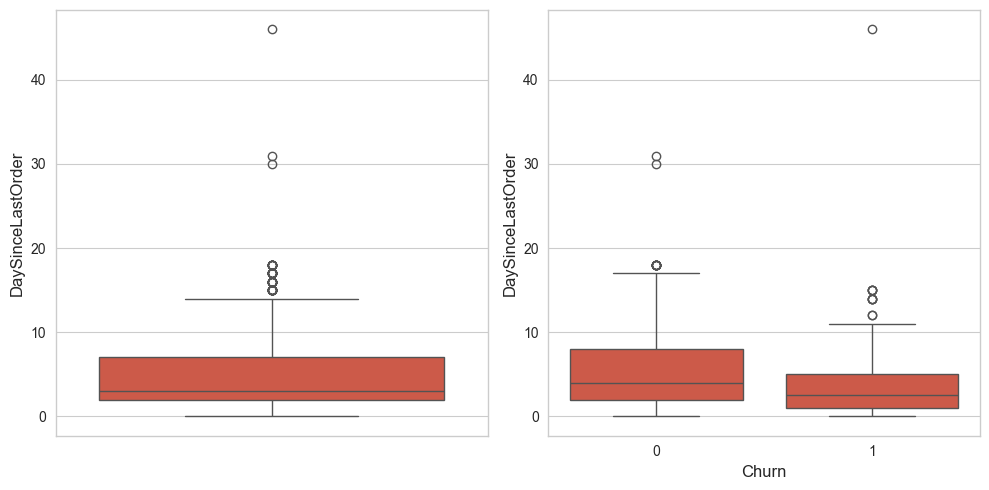

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

_ = sns.boxplot(data=df, y="DaySinceLastOrder", ax=axes[0])
_ = sns.boxplot(data=df, x="Churn", y="DaySinceLastOrder", ax=axes[1])

_ = fig.tight_layout()

**CashbackAmount**

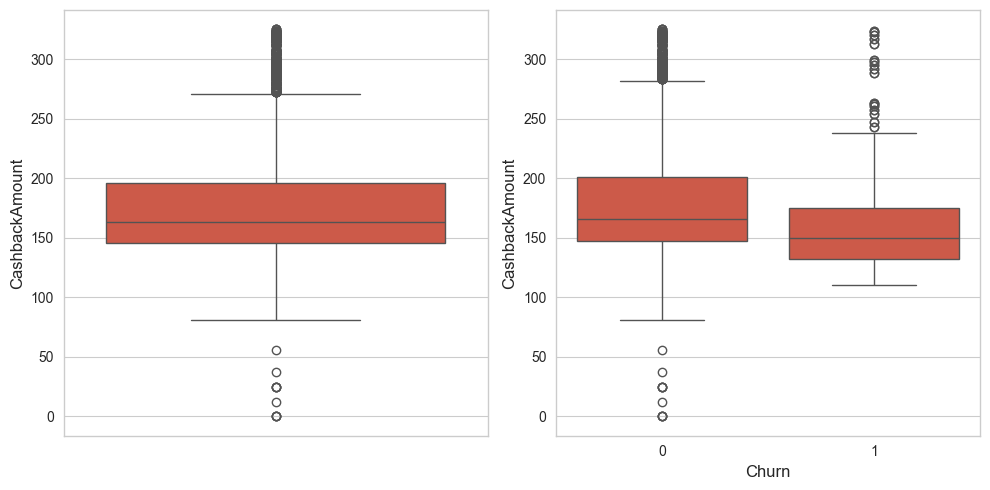

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

_ = sns.boxplot(data=df, y="CashbackAmount", ax=axes[0])
_ = sns.boxplot(data=df, x="Churn", y="CashbackAmount", ax=axes[1])

_ = fig.tight_layout()

**PreferredPaymentMode**

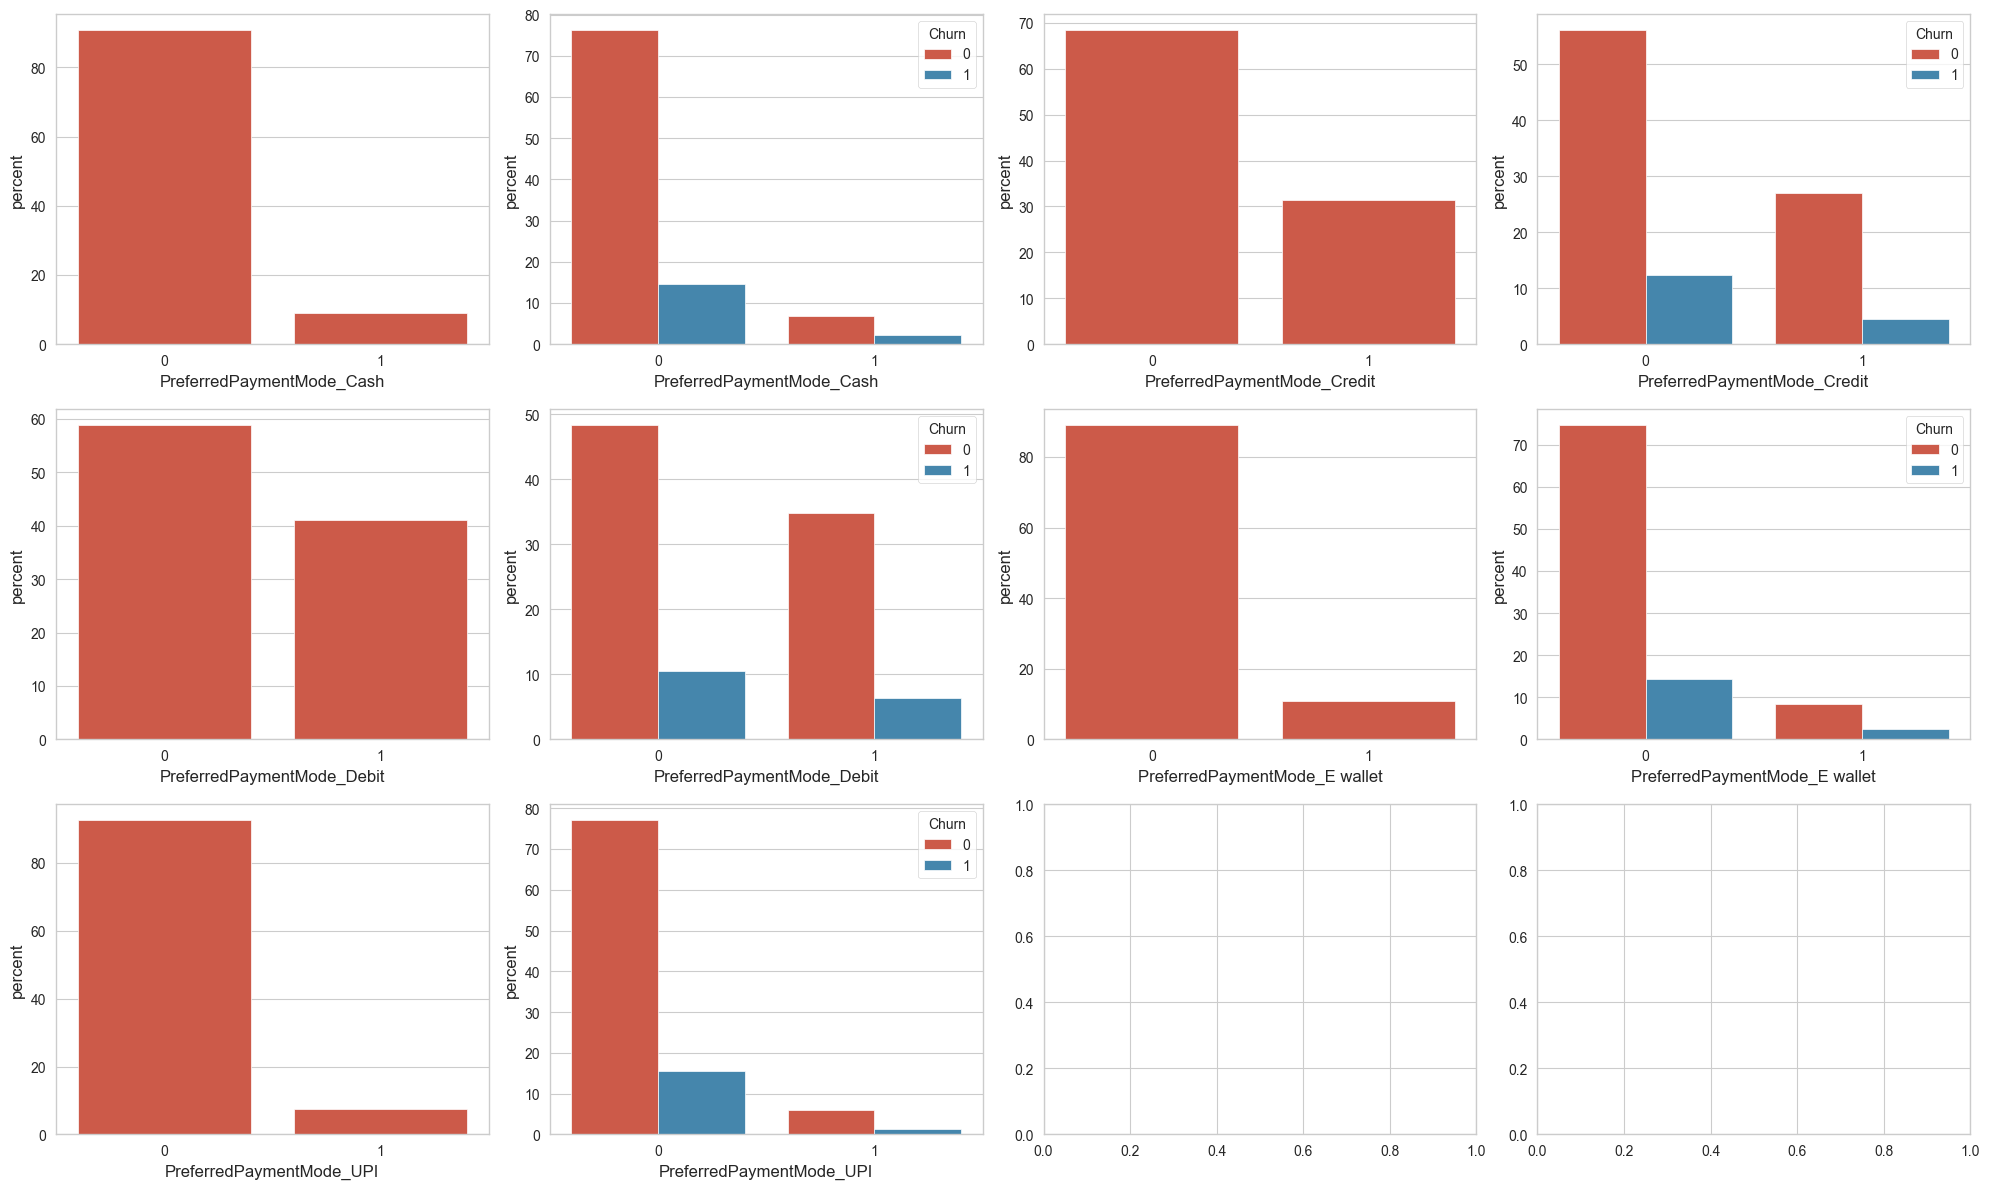

In [81]:
fig, axes = plt.subplots(3, 4, figsize=(20,12))

_ = sns.countplot(data=df, x="PreferredPaymentMode_Cash", stat="percent", ax=axes[0,0])
_ = sns.countplot(data=df, x="PreferredPaymentMode_Cash", hue="Churn", stat="percent", ax=axes[0,1])

_ = sns.countplot(data=df, x="PreferredPaymentMode_Credit", stat="percent", ax=axes[0,2])
_ = sns.countplot(data=df, x="PreferredPaymentMode_Credit", hue="Churn", stat="percent", ax=axes[0,3])

_ = sns.countplot(data=df, x="PreferredPaymentMode_Debit", stat="percent", ax=axes[1,0])
_ = sns.countplot(data=df, x="PreferredPaymentMode_Debit", hue="Churn", stat="percent", ax=axes[1,1])

_ = sns.countplot(data=df, x="PreferredPaymentMode_E wallet", stat="percent", ax=axes[1,2])
_ = sns.countplot(data=df, x="PreferredPaymentMode_E wallet", hue="Churn", stat="percent", ax=axes[1,3])

_ = sns.countplot(data=df, x="PreferredPaymentMode_UPI", stat="percent", ax=axes[2,0])
_ = sns.countplot(data=df, x="PreferredPaymentMode_UPI", hue="Churn", stat="percent", ax=axes[2,1])


_ = fig.tight_layout()

**PreferedOrderCat**

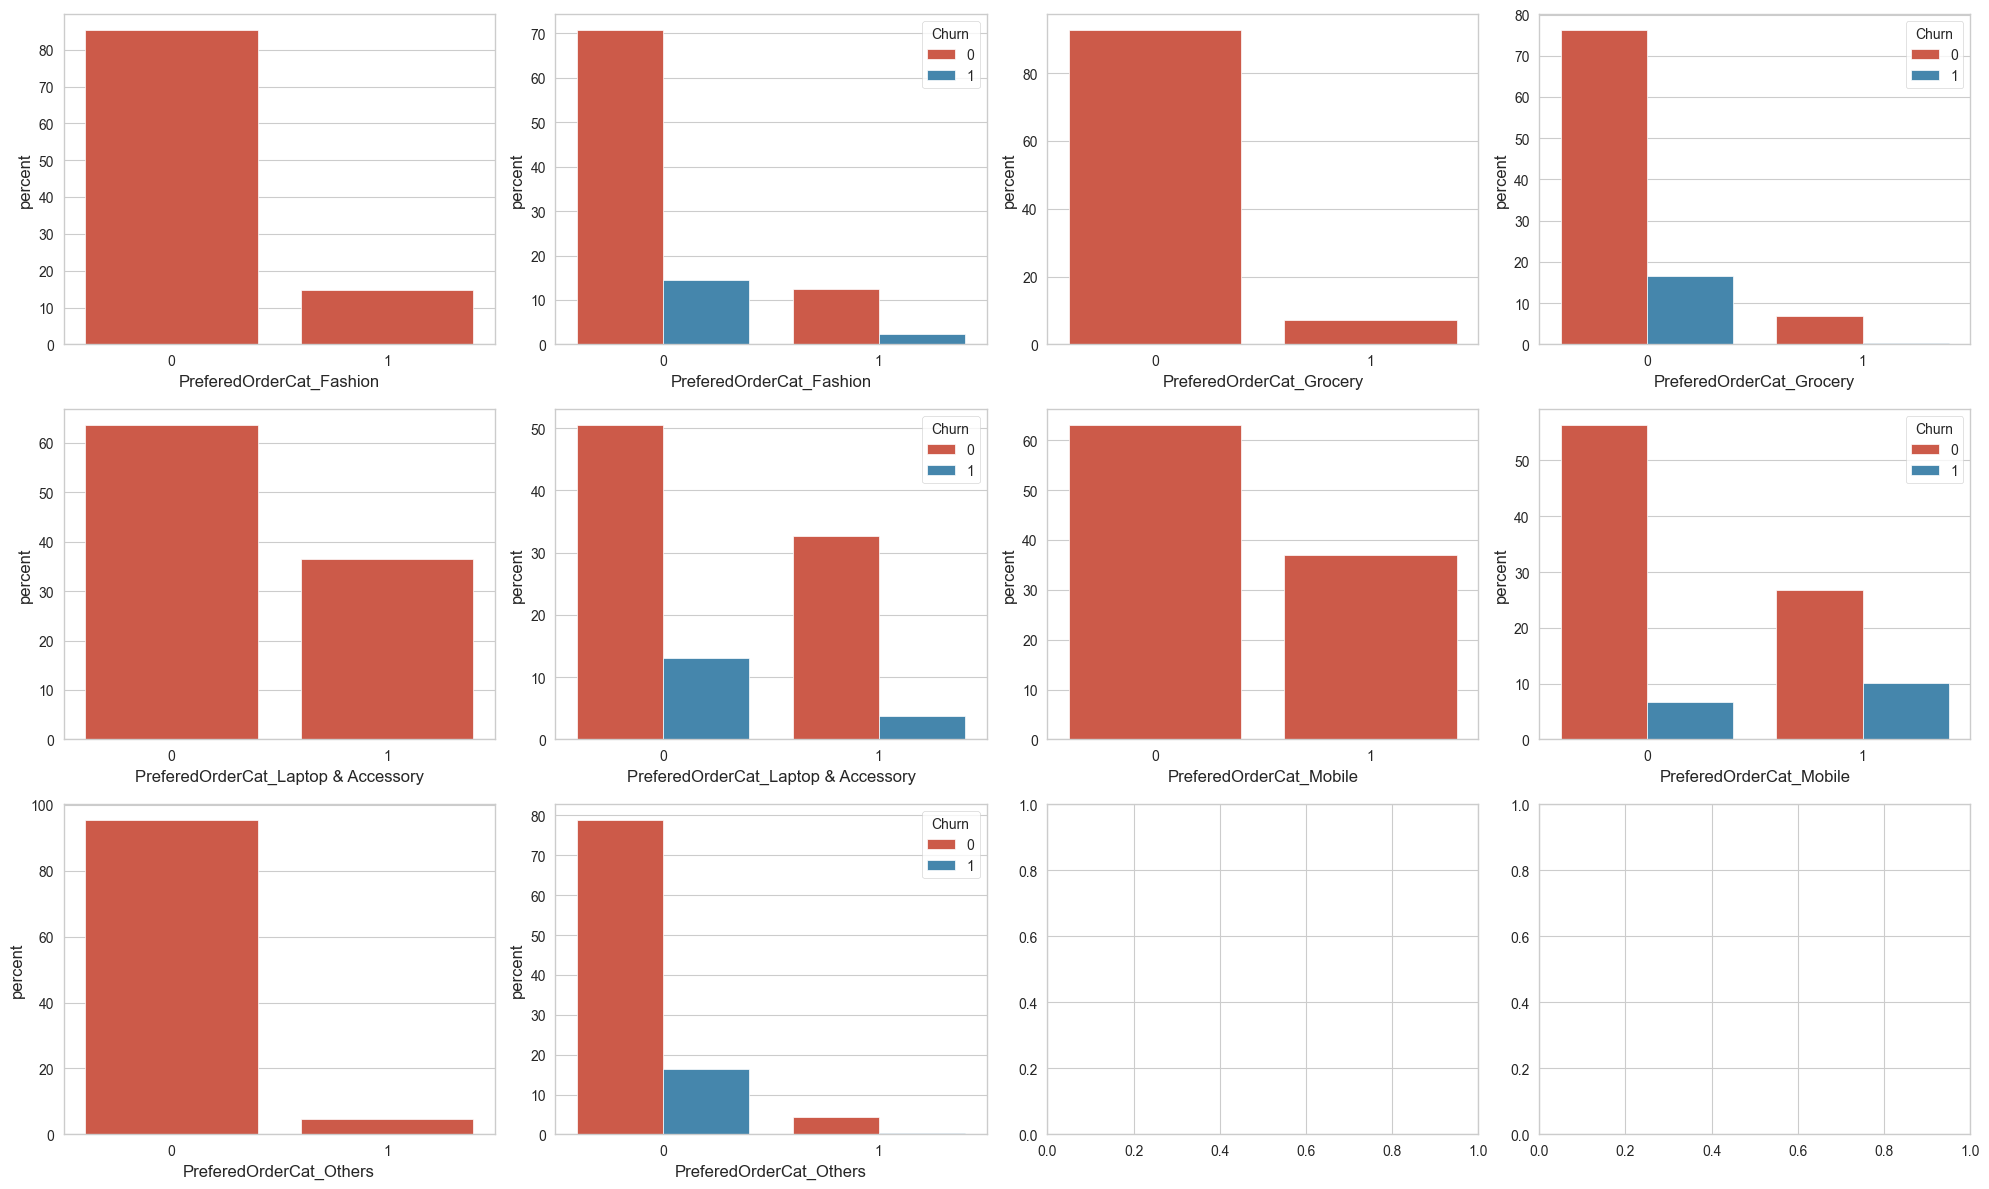

In [82]:
fig, axes = plt.subplots(3, 4, figsize=(20,12))

_ = sns.countplot(data=df, x="PreferedOrderCat_Fashion", stat="percent", ax=axes[0,0])
_ = sns.countplot(data=df, x="PreferedOrderCat_Fashion", hue="Churn", stat="percent", ax=axes[0,1])

_ = sns.countplot(data=df, x="PreferedOrderCat_Grocery", stat="percent", ax=axes[0,2])
_ = sns.countplot(data=df, x="PreferedOrderCat_Grocery", hue="Churn", stat="percent", ax=axes[0,3])

_ = sns.countplot(data=df, x="PreferedOrderCat_Laptop & Accessory", stat="percent", ax=axes[1,0])
_ = sns.countplot(data=df, x="PreferedOrderCat_Laptop & Accessory", hue="Churn", stat="percent", ax=axes[1,1])

_ = sns.countplot(data=df, x="PreferedOrderCat_Mobile", stat="percent", ax=axes[1,2])
_ = sns.countplot(data=df, x="PreferedOrderCat_Mobile", hue="Churn", stat="percent", ax=axes[1,3])

_ = sns.countplot(data=df, x="PreferedOrderCat_Others", stat="percent", ax=axes[2,0])
_ = sns.countplot(data=df, x="PreferedOrderCat_Others", hue="Churn", stat="percent", ax=axes[2,1])


_ = fig.tight_layout()

**Insights até o momento**

Pacere que as variáveis quando comparadas ao Churn não parecem fazer tanto sentido, talvez o fato dessa variável é dada pelo tempo do cliente com a empresa faça essa distorção nos dados.

Uma possibilidade de atuar é ignorar essa variável e utilizar proxies que tenham nesse dataset para gerar uma nova coluna de churn que tenha mais sentido nesse recorte.

**Variáveis com possíveis outliers**
- Tenure
- WarehouseToHome
- HourSpendOnApp
- NumberOfAddress
- OrderAmountHikeFromlastYear
- CouponUsed
- OrderCount
- DaySinceLastOrder
- CashbackAmount

**Proxies para o modelo**
- SatisfactionScore
- Complain
- OrderCount
- DaySinceLastOrder

# Outliers e normalização dos dados

In [15]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'PreferredPaymentMode_Cash', 'PreferredPaymentMode_Credit',
       'PreferredPaymentMode_Debit', 'PreferredPaymentMode_E wallet',
       'PreferredPaymentMode_UPI', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile', 'PreferedOrderCat_Others'],
      dtype='object')